In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [5]:
import geopandas as gpd

Note that the green spaces dataset has been taken from https://open.toronto.ca/dataset/green-spaces/

In [6]:
green_spaces = gpd.read_file("green-spaces.geojson")

In [7]:
# Display dataset info
green_spaces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   _id              3309 non-null   int64   
 1   AREA_ID          3309 non-null   int64   
 2   AREA_ATTR_ID     3309 non-null   int64   
 3   PARENT_AREA_ID   3309 non-null   int64   
 4   AREA_CLASS_ID    3309 non-null   float64 
 5   AREA_CLASS       3309 non-null   object  
 6   AREA_SHORT_CODE  3309 non-null   object  
 7   AREA_LONG_CODE   3309 non-null   object  
 8   AREA_NAME        3309 non-null   object  
 9   AREA_DESC        3309 non-null   object  
 10  OBJECTID         3309 non-null   float64 
 11  geometry         3309 non-null   geometry
dtypes: float64(2), geometry(1), int64(4), object(5)
memory usage: 310.3+ KB


In [8]:
# Display the first few rows
green_spaces.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
0,1,1,1,0,890.0,OTHER_CEMETERY,None,4009,ARMADALE FREE METHODIST CEMETERY,ARMADALE FREE METHODIST CEMETERY,1.0,"MULTIPOLYGON (((-79.25752 43.82953, -79.25739 ..."
1,2,2,2,0,890.0,OTHER_CEMETERY,None,4010,HILLSIDE CEMETERY,HILLSIDE CEMETERY,2.0,"MULTIPOLYGON (((-79.18962 43.82488, -79.18949 ..."
2,3,3,3,0,890.0,OTHER_CEMETERY,None,4011,HIGHLAND MEMORY GARDENS,HIGHLAND MEMORY GARDENS,3.0,"MULTIPOLYGON (((-79.34758 43.80810, -79.34758 ..."
3,4,4,4,0,890.0,OTHER_CEMETERY,None,4005,CHRISTIE'S METHODIST CEMETERY,CHRISTIE'S METHODIST CEMETERY,4.0,"MULTIPOLYGON (((-79.31835 43.79902, -79.31851 ..."
4,5,5,5,0,890.0,OTHER_CEMETERY,None,4012,ST. PAUL'S ANGLICAN CHURCH CEMETERY,ST. PAUL'S ANGLICAN CHURCH CEMETERY,5.0,"MULTIPOLYGON (((-79.31649 43.79640, -79.31650 ..."


In [9]:
green_spaces['geometry'].geom_type.unique()

array(['MultiPolygon'], dtype=object)

In [10]:
green_spaces['geometry'].is_valid.value_counts()

True     3308
False       1
Name: count, dtype: int64

We can see that almost all geometries are valid, except for one invalid geometry.

<Axes: >

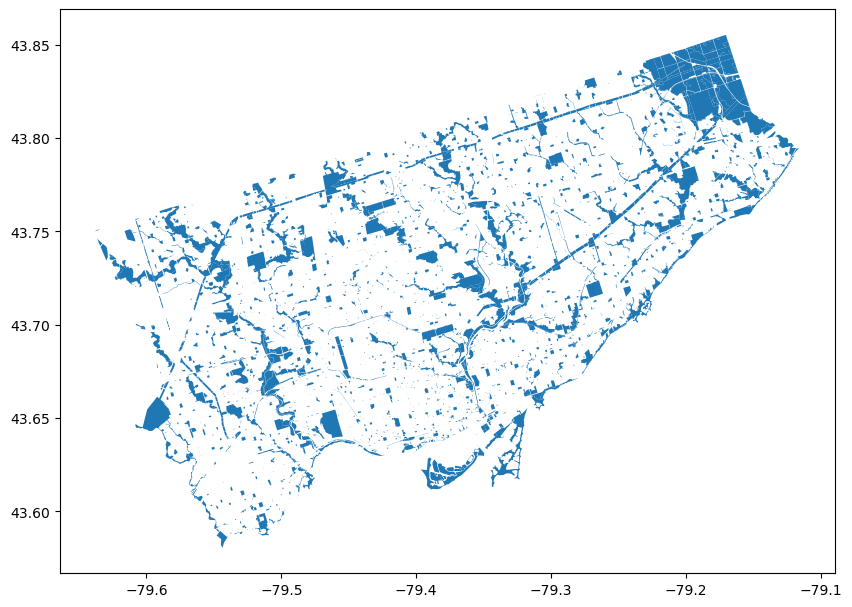

In [11]:
green_spaces.plot(figsize=(10, 10))

In [12]:
invalid_rows = green_spaces[~green_spaces['geometry'].is_valid]
invalid_rows

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_CLASS_ID,AREA_CLASS,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID,geometry
2695,2696,40230,312,0,802.0,Park,312,312,EAST DON PARKLAND,None,4330132.0,"MULTIPOLYGON (((-79.37325 43.78777, -79.37327 ..."


Let's drop this invalid row, since dropping 1 row will not significantly affect the dataset.

In [13]:
# Drop invalid geometries
green_spaces = green_spaces[green_spaces['geometry'].is_valid]

# Check if it is now valid
green_spaces['geometry'].is_valid.value_counts()

True    3308
Name: count, dtype: int64

In [14]:
# Count occurrences of each AREA_CLASS
green_spaces['AREA_CLASS'].value_counts()

AREA_CLASS
Park                            1606
OTHER_CITY                       678
OTHER_HYDRO                      251
Building Grounds                 161
OTHER_ROAD                       138
OTHER_PROVINCIAL_FEDERAL         118
OTHER_TRCA                       114
Traffic Island                    80
OTHER_CEMETERY                    64
Cul de Sac                        26
Open Green Space                  23
OTHER_GOLFCOURSE                  20
Civic Centre Square                6
Boulevard                          6
Golf Course                        5
Cemetery                           5
Hydro Field/Utility Corridor       3
Orphaned Space                     3
OTHER_UNKNOWN                      1
Name: count, dtype: int64

We can see that 'Park' is the most dominant class, let's visualize what this looks like.

<Axes: >

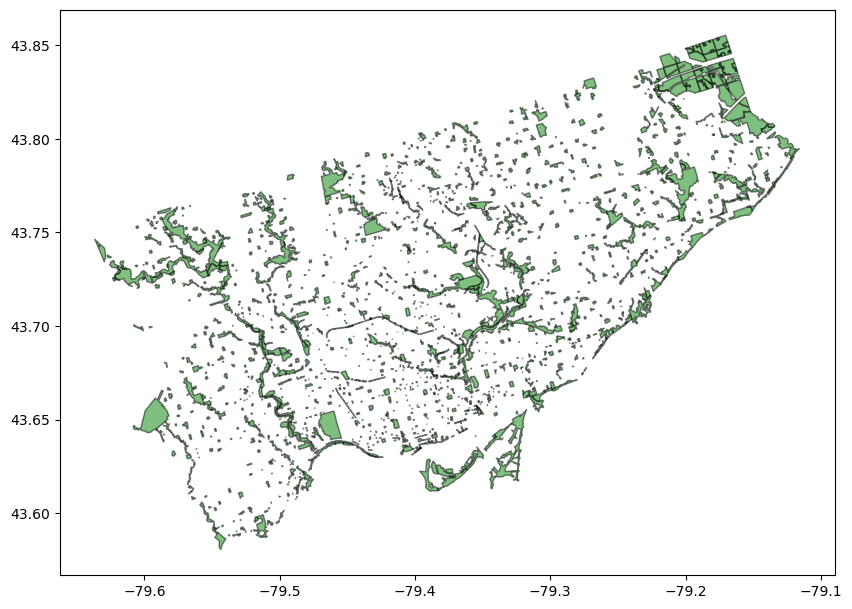

In [15]:
# Plot parks
parks = green_spaces[green_spaces['AREA_CLASS'] == 'Park']
parks.plot(figsize=(10, 10), color="green", alpha=0.5, edgecolor="black")

The data visaulisation for parks looks amazing!

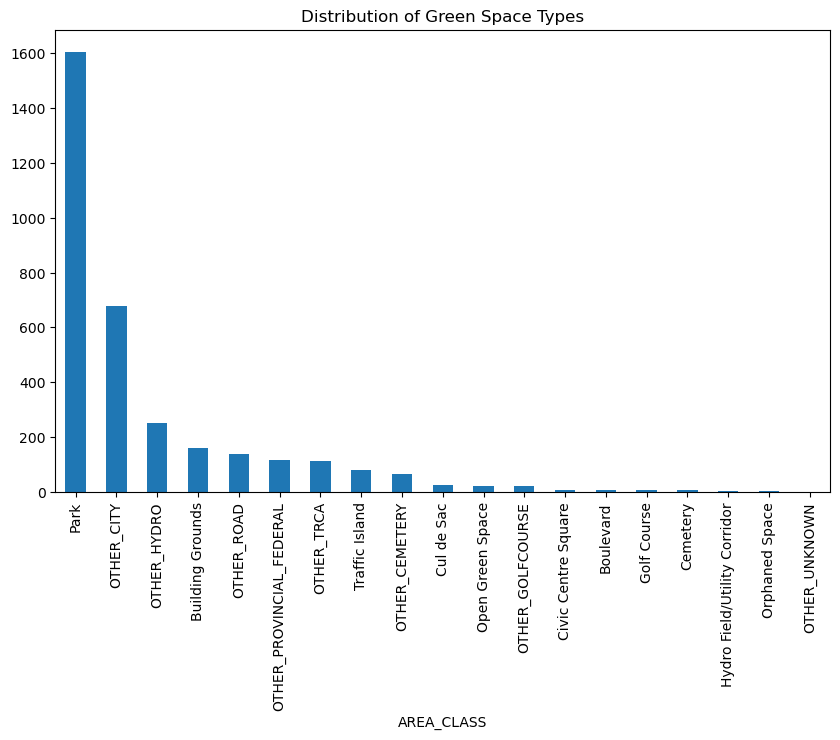

In [16]:
# Plot a bar chart for AREA_CLASS distribution
green_spaces['AREA_CLASS'].value_counts().plot(kind='bar', figsize=(10, 6), title="Distribution of Green Space Types")
plt.show()

Let's try cross-referencing this green space data with housing data and its prices

In [17]:
# Load the datasets
coordinates_df = pd.read_csv("toronto_neighbourhoods_coordinates.csv")
census_data_df = pd.read_csv("toronto_neighbourhoods_census_data.csv")

In [18]:
coordinates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  140 non-null    object 
 1   lat            140 non-null    float64
 2   lon            140 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


In [19]:
coordinates_df.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


In [20]:
census_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         560 non-null    int64 
 1   neighbourhood                560 non-null    object
 2   single_detached_house        560 non-null    int64 
 3   apartment_five_storeys_plus  560 non-null    int64 
 4   movable_dwelling             560 non-null    int64 
 5   semi_detached_house          560 non-null    int64 
 6   row_house                    560 non-null    int64 
 7   duplex                       560 non-null    int64 
 8   apartment_five_storeys_less  560 non-null    int64 
 9   other_house                  560 non-null    int64 
 10  average_house_value          560 non-null    int64 
 11  shelter_costs_owned          560 non-null    int64 
 12  shelter_costs_rented         560 non-null    int64 
dtypes: int64(12), object(1)
memory usag

In [21]:
census_data_df.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


In [22]:
# Merge datasets on 'neighbourhood'
merged_df = pd.merge(census_data_df, coordinates_df, on='neighbourhood')

In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         560 non-null    int64  
 1   neighbourhood                560 non-null    object 
 2   single_detached_house        560 non-null    int64  
 3   apartment_five_storeys_plus  560 non-null    int64  
 4   movable_dwelling             560 non-null    int64  
 5   semi_detached_house          560 non-null    int64  
 6   row_house                    560 non-null    int64  
 7   duplex                       560 non-null    int64  
 8   apartment_five_storeys_less  560 non-null    int64  
 9   other_house                  560 non-null    int64  
 10  average_house_value          560 non-null    int64  
 11  shelter_costs_owned          560 non-null    int64  
 12  shelter_costs_rented         560 non-null    int64  
 13  lat                 

In [24]:
merged_df.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,lat,lon
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870,43.805441,-79.266712
1,2006,Agincourt North,3295,2060,0,775,1425,600,565,0,293140,1055,886,43.805441,-79.266712
2,2011,Agincourt North,3385,2130,5,820,1465,610,705,20,366667,1160,976,43.805441,-79.266712
3,2016,Agincourt North,3345,2120,5,805,1440,645,735,15,459051,1411,1202,43.805441,-79.266712
4,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892,43.788658,-79.265612


In [25]:
# Convert to GeoDataFrame
merged_df['geometry'] = gpd.points_from_xy(merged_df['lon'], merged_df['lat'])
merged_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry', crs="EPSG:4326")

In [26]:
merged_gdf.head()

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,lat,lon,geometry
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870,43.805441,-79.266712,POINT (-79.26671 43.80544)
1,2006,Agincourt North,3295,2060,0,775,1425,600,565,0,293140,1055,886,43.805441,-79.266712,POINT (-79.26671 43.80544)
2,2011,Agincourt North,3385,2130,5,820,1465,610,705,20,366667,1160,976,43.805441,-79.266712,POINT (-79.26671 43.80544)
3,2016,Agincourt North,3345,2120,5,805,1440,645,735,15,459051,1411,1202,43.805441,-79.266712,POINT (-79.26671 43.80544)
4,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892,43.788658,-79.265612,POINT (-79.26561 43.78866)


In [27]:
avg_price_by_year = merged_df.groupby('year')['average_house_value'].mean()
avg_price_by_year

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

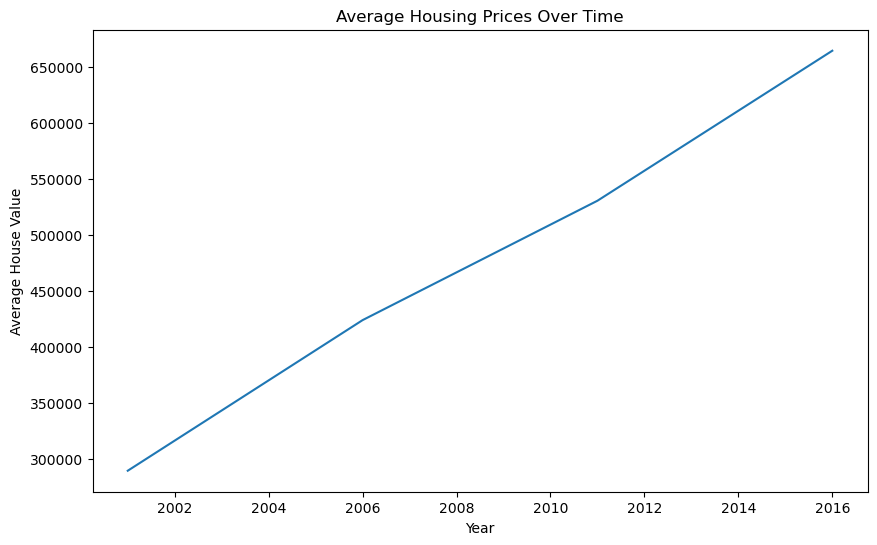

In [28]:
avg_price_by_year.plot(kind='line', figsize=(10, 6), title="Average Housing Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Average House Value")
plt.show()

/tmp/ipykernel_52/4054451529.py:4: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


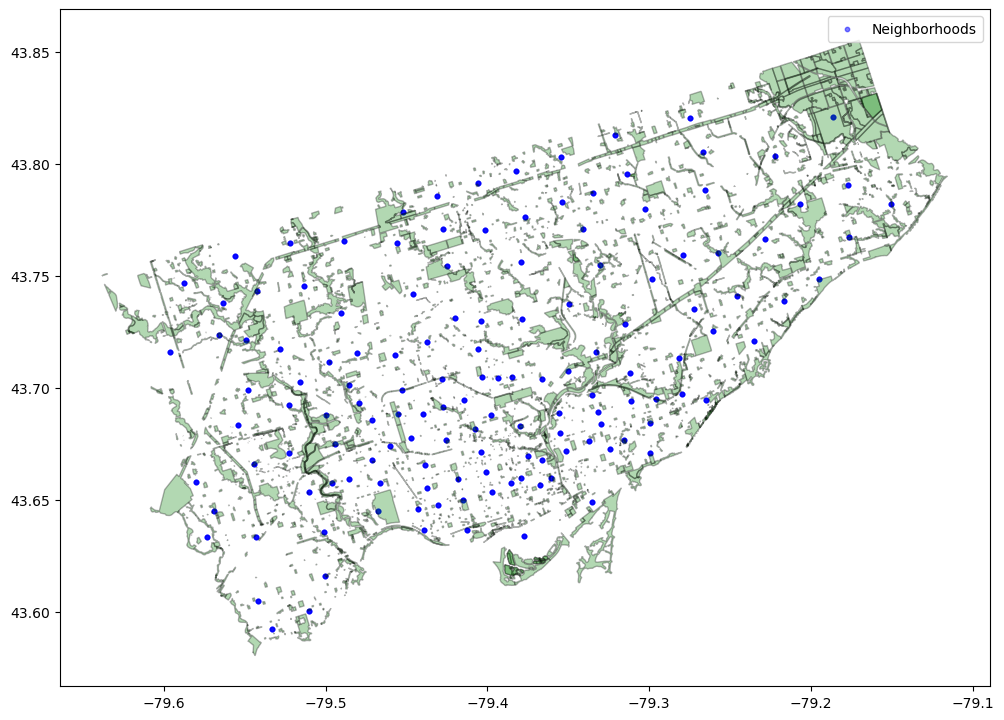

In [29]:
# Plot neighborhoods
ax = merged_gdf.plot(figsize=(12, 12), color='blue', alpha=0.5, markersize=10, label="Neighborhoods")
green_spaces.plot(ax=ax, color='green', alpha=0.3, edgecolor='black', label="Green Spaces")
plt.legend()
plt.show()

Let's perform proximity analysis and calculate the distance between each neighbourhood and the nearest green space.

In [30]:
# Calculate dist. to nearest green space
merged_gdf['distance_to_nearest_green_space'] = merged_gdf.geometry.apply(
    lambda x: green_spaces.geometry.distance(x).min()
)

# View these distances neighbourhood-wise
merged_gdf[['neighbourhood', 'distance_to_nearest_green_space', 'average_house_value']].head()

/tmp/ipykernel_52/192664342.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lambda x: green_spaces.geometry.distance(x).min()


,neighbourhood,distance_to_nearest_green_space,average_house_value
0,Agincourt North,0.000645,200388
1,Agincourt North,0.000645,293140
2,Agincourt North,0.000645,366667
3,Agincourt North,0.000645,459051
4,Agincourt South-Malvern West,0.002119,203047


In [31]:
# Reproject (UTM zone for Toronto)
merged_gdf = merged_gdf.to_crs(epsg=32617)  # UTM Zone 17N
green_spaces = green_spaces.to_crs(epsg=32617)

# Recalculate distances with the projected CRS
merged_gdf['distance_to_nearest_green_space'] = merged_gdf.geometry.apply(
    lambda x: green_spaces.geometry.distance(x).min()
)

# Check the updated distances
merged_gdf[['neighbourhood', 'distance_to_nearest_green_space', 'average_house_value']].head()

,neighbourhood,distance_to_nearest_green_space,average_house_value
0,Agincourt North,71.500430,200388
1,Agincourt North,71.500430,293140
2,Agincourt North,71.500430,366667
3,Agincourt North,71.500430,459051
4,Agincourt South-Malvern West,220.713903,203047


In [32]:
# Calculate the correlation
correlation = merged_gdf['distance_to_nearest_green_space'].corr(merged_gdf['average_house_value'])
print(f"Correlation between distance to green spaces and house prices: {correlation}")

Correlation between distance to green spaces and house prices: 0.06173170907317185


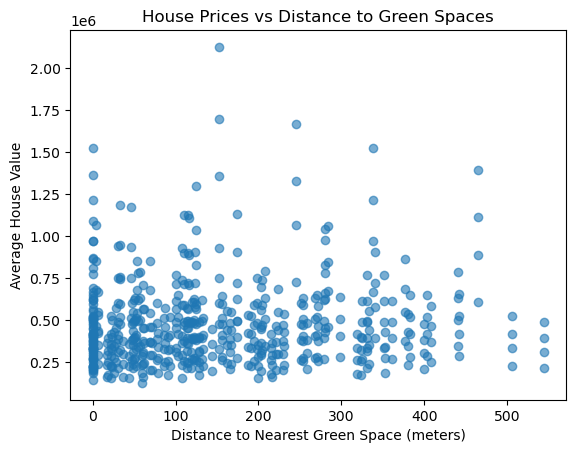

In [33]:
# Scatter plot
plt.scatter(
    merged_gdf['distance_to_nearest_green_space'],
    merged_gdf['average_house_value'],
    alpha=0.6
)
plt.title("House Prices vs Distance to Green Spaces")
plt.xlabel("Distance to Nearest Green Space (meters)")
plt.ylabel("Average House Value")
plt.show()